In [5]:
import pandas as pd
from functools import reduce

# Load fish data
fish_abundance_df = pd.read_csv('./fish_species_abundance.csv')
fish_yearly_df = pd.read_csv('./raw/yearly_fish_counts.csv')

fish_abundance_clean = fish_abundance_df[['Common Name', 'Station Number', 'Station Description', 'Sample Years', 'Total Fish Count', 'Yearly Average', 'Waterway', 'x', 'y']]
fish_yearly_clean = fish_yearly_df[['Fish Count', 'Species List', 'Species Count', 'Station Number', 'Station Name', 'Waterway', 'Year', 'x', 'y']]

# Output preview
print(fish_abundance_clean.head())
print(fish_yearly_clean.head())

             Common Name  Station Number  \
0          golden shiner              78   
1               bluegill             106   
2           gizzard shad             106   
3  blackstripe topminnow              31   
4           gizzard shad              31   

                                 Station Description Sample Years  \
0                        Higgins Creek at Wille Road         2001   
1  West Fork North Branch Chicago River at Dundee...         2001   
2  West Fork North Branch Chicago River at Dundee...         2001   
3  Middle Fork North Branch Chicago River at Lake...         2001   
4  Middle Fork North Branch Chicago River at Lake...         2001   

   Total Fish Count  Yearly Average                                Waterway  \
0                 1               1                           Higgins Creek   
1                 1               1    West Fork North Branch Chicago River   
2                 3               3    West Fork North Branch Chicago River   
3   

In [19]:
import pandas as pd
from functools import reduce

# Âè™‰øùÁïôÂ≠óÊÆµÊ†áÂáÜÂêçÁß∞‰ª•ÂÖç KeyError
chemical_files = [
    'Phosphorous.csv', 'NO2_NO3.csv', 'Fecal_Coliform.csv', 'Chlorophyll-A.csv', 'NH3.csv',
    'Chloride.csv', 'TKN.csv', 'Total_Dissolved_Solids.csv', 'SO4.csv', 'Suspended_Solids.csv', 'TOC.csv'
]

chemical_dfs = []

for file in chemical_files:
    df = pd.read_csv(f'./{file}')
    param = file.replace('.csv', '')

    # Áªü‰∏ÄÂ≠óÊÆµÂêç
    if 'Result Average' in df.columns:
        avg_col = 'Result Average'
    elif 'Result Median' in df.columns:
        avg_col = 'Result Median'
    else:
        print(f'‚ö†Ô∏è Êó†Ê≥ïËØÜÂà´Âπ≥ÂùáÂÄºÂ≠óÊÆµ: {file}')
        continue

    # Áªü‰∏ÄÂ≠óÊÆµÈÄâÊã©ÂíåÈáçÂëΩÂêç
    df_clean = df.rename(columns={
        avg_col: f'{param}_Average',
        'Result Min': f'{param}_Min',
        'Result Max': f'{param}_Max'
    })

    # ÈÄâÊã©ÈÄöÁî®Â≠óÊÆµÔºåËÄÉËôëÊñá‰ª∂ÂèØËÉΩÂ≠óÊÆµ‰∏çÂêå
    keep_cols = ['Station Name', 'Waterway', 'Year', f'{param}_Average', f'{param}_Min', f'{param}_Max', 'x', 'y']
    df_clean = df_clean[[col for col in keep_cols if col in df_clean.columns]]

    chemical_dfs.append(df_clean)

# ÂêàÂπ∂ÊâÄÊúâ chemical Êï∞ÊçÆ
chemical_merged_df = reduce(lambda left, right: pd.merge(
    left, right, on=['Station Name', 'Waterway', 'Year', 'x', 'y'], how='outer'
), chemical_dfs)

# ‰øùÂ≠ò‰∏∫CSV
chemical_merged_df.to_csv('chemical_water_quality_cleaned.csv', index=False)

‚úÖ Â∑≤ÊàêÂäüÂØºÂá∫ chemical Êï∞ÊçÆ‰∏∫ chemical_water_quality_cleaned.csv


In [24]:
combined_df = pd.merge(fish_yearly_clean, chemical_merged_df, on=['Station Name', 'Waterway', 'Year', 'x', 'y'], how='left')


In [6]:
combined_df = pd.read_csv('./combined_df.csv')


In [13]:
import pandas as pd

# Â¶ÇÊûú‰Ω†ËøòÊ≤°ÂØºÂÖ•Êñá‰ª∂Ôºö
# combined_df = pd.read_csv('combined_df.csv')

def extract_species_counts(species_string):
    species_dict = {}
    if pd.isna(species_string):
        return species_dict
    
    parts = species_string.split(',')
    for part in parts:
        part = part.strip()
        if part:
            tokens = part.split()
            try:
                count = int(tokens[0])
                species = ' '.join(tokens[1:]).lower()
                species_dict[species] = species_dict.get(species, 0) + count
            except (ValueError, IndexError):
                continue
    return species_dict

# Â∫îÁî®ÂáΩÊï∞Âπ∂Â±ïÂºÄ‰∏∫ DataFrame
species_dicts = combined_df['Species List'].apply(extract_species_counts)
species_df = pd.DataFrame(species_dicts.tolist()).fillna(0).astype(int)

# ÂêàÂπ∂Êñ∞ÁöÑÈ±ºÁ±ªÂàó
combined_expanded = pd.concat([combined_df.drop(columns=['Species List']), species_df], axis=1)

# ‰øùÂ≠òÁªìÊûú
combined_expanded.to_csv('combined_df_expanded_species.csv', index=False)
print("‚úÖ ÊàêÂäüÁîüÊàêÊØè‰∏™È±ºÁßç‰Ωú‰∏∫Áã¨Á´ãÂàóÁöÑÊñá‰ª∂Ôºöcombined_df_expanded_species.csv")


‚úÖ ÊàêÂäüÁîüÊàêÊØè‰∏™È±ºÁßç‰Ωú‰∏∫Áã¨Á´ãÂàóÁöÑÊñá‰ª∂Ôºöcombined_df_expanded_species.csv


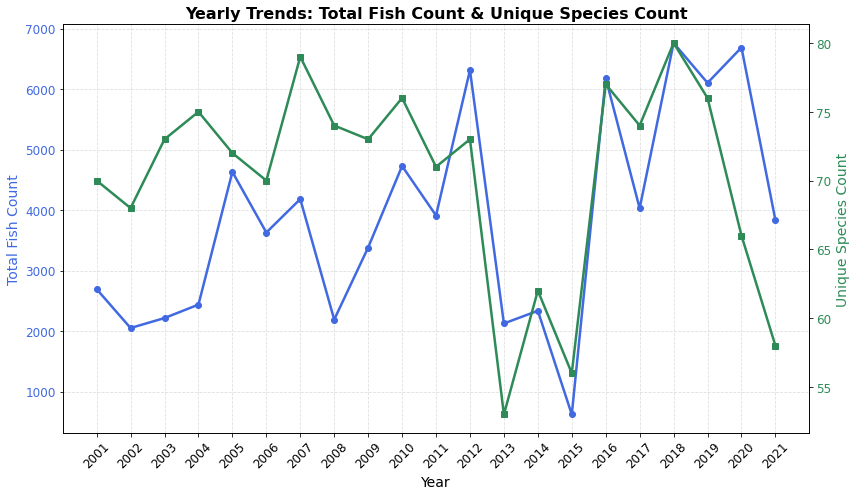

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')

# È±ºÁ±ªÂàóËØÜÂà´
non_species_cols = ['Fish Count', 'Species Count', 'Station Number', 'Station Name', 'Waterway', 'Year', 'x', 'y']
fish_columns = [col for col in df.columns if col not in non_species_cols and not col.startswith('Unnamed')]

# È±ºÁ±ªÂàóËΩ¨Êï¥Êï∞
df[fish_columns] = df[fish_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Year'] = df['Year'].astype(int)

# ËÆ°ÁÆóÁªüËÆ°
total_fish_by_year = df.groupby('Year')['Fish Count'].sum()
species_presence = df.groupby('Year')[fish_columns].apply(
    lambda x: ((x > 0).any(axis=0)).sum()
)

# üîß ËΩ¨Êç¢‰∏∫‰∏ÄÁª¥ numpy Êï∞ÁªÑ
x_years = total_fish_by_year.index.to_numpy()
fish_counts = total_fish_by_year.to_numpy().reshape(-1)  # ‰øùËØÅÊòØ‰∏ÄÁª¥
species_counts = species_presence.to_numpy().reshape(-1)

# üé® ÁªòÂõæ
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(x_years, fish_counts, color='royalblue', linewidth=2.5, marker='o', label='Total Fish Count')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Fish Count', color='royalblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(which='major', linestyle='--', alpha=0.4)

# Á¨¨‰∫å‰∏™ y ËΩ¥
ax2 = ax1.twinx()
ax2.plot(x_years, species_counts, color='seagreen', linewidth=2.5, marker='s', label='Unique Species Count')
ax2.set_ylabel('Unique Species Count', color='seagreen', fontsize=14)
ax2.tick_params(axis='y', labelcolor='seagreen')
ax2.tick_params(axis='both', labelsize=12)

# ËÆæÁΩÆÂπ¥‰ªΩ‰∏∫Êï¥Êï∞ÂàªÂ∫¶
ax1.set_xticks(sorted(x_years))
ax1.set_xticklabels(sorted(x_years), rotation=45)

plt.title('Yearly Trends: Total Fish Count & Unique Species Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# ËØªÂèñÂéüÂßãÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)

# ÊâÄÊúâÂπ¥‰ªΩÊÄªÊï∞
all_years = sorted(df['Year'].unique())
num_years = len(all_years)

# ËÆæÂÆöÈòàÂÄºÔºàÊØîÂ¶Ç 90% Âπ¥‰ªΩÔºâ
threshold = int(0.9 * num_years)

# ÁªüËÆ°ÊØè‰∏™Á´ôÁÇπÁöÑË¶ÜÁõñÂπ¥‰ªΩÊï∞
station_year_counts = df.groupby('Station Name')['Year'].nunique()

# ‰øùÁïôÈÇ£‰∫õÂπ¥‰ªΩË¶ÜÁõñÊï∞ ‚â• ÈòàÂÄº ÁöÑÁ´ôÁÇπ
almost_always_stations = station_year_counts[station_year_counts >= threshold].index

# ËøáÊª§Êï∞ÊçÆ
df_cleaned = df[df['Station Name'].isin(almost_always_stations)].copy()

# ËæìÂá∫ÁªìÊûú
df_cleaned.to_csv('combined_df_90percent_stations.csv', index=False)
print(f"‚úÖ Ê∏ÖÊ¥óÂÆåÊàêÔºö‰øùÁïô‰∫Ü {len(almost_always_stations)} ‰∏™Á´ôÁÇπÔºåËá≥Â∞ëÂá∫Áé∞Âú® {threshold} Âπ¥‰ªΩÔºàÂÖ± {num_years} Âπ¥Ôºâ„ÄÇ")


‚úÖ Ê∏ÖÊ¥óÂÆåÊàêÔºö‰øùÁïô‰∫Ü 10 ‰∏™Á´ôÁÇπÔºåËá≥Â∞ëÂá∫Áé∞Âú® 18 Âπ¥‰ªΩÔºàÂÖ± 21 Âπ¥Ôºâ„ÄÇ


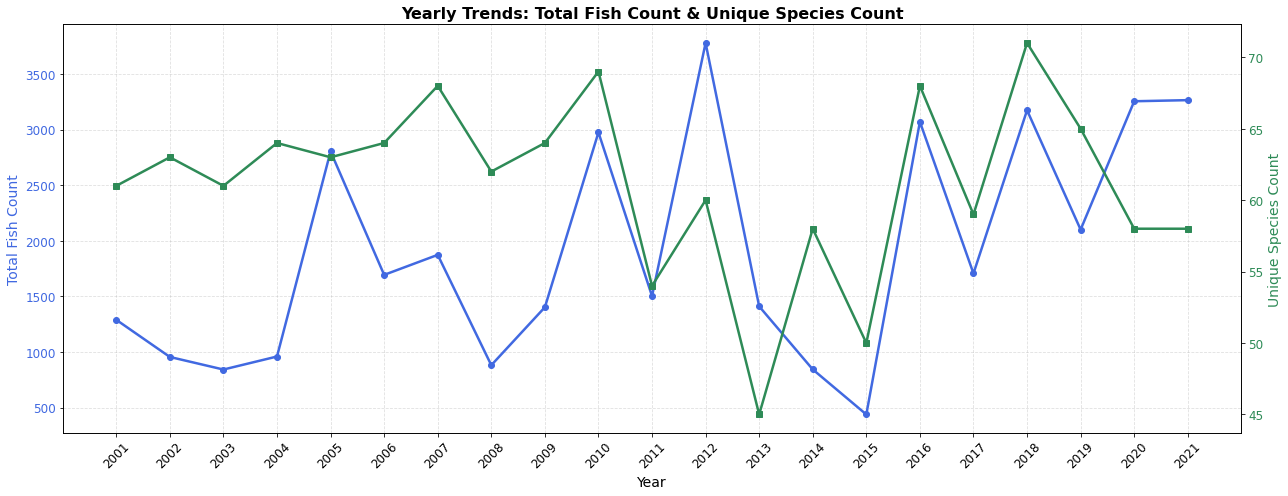

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ËØªÂèñÊï∞ÊçÆ
df = df_cleaned

# È±ºÁ±ªÂàóËØÜÂà´
non_species_cols = ['Fish Count', 'Species Count', 'Station Number', 'Station Name', 'Waterway', 'Year', 'x', 'y']
fish_columns = [col for col in df.columns if col not in non_species_cols and not col.startswith('Unnamed')]

# È±ºÁ±ªÂàóËΩ¨Êï¥Êï∞
df[fish_columns] = df[fish_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Year'] = df['Year'].astype(int)

# ËÆ°ÁÆóÁªüËÆ°
total_fish_by_year = df.groupby('Year')['Fish Count'].sum()
species_presence = df.groupby('Year')[fish_columns].apply(
    lambda x: ((x > 0).any(axis=0)).sum()
)

# üîß ËΩ¨Êç¢‰∏∫‰∏ÄÁª¥ numpy Êï∞ÁªÑ
x_years = total_fish_by_year.index.to_numpy()
fish_counts = total_fish_by_year.to_numpy().reshape(-1)  # ‰øùËØÅÊòØ‰∏ÄÁª¥
species_counts = species_presence.to_numpy().reshape(-1)

# üé® ÁªòÂõæ
fig, ax1 = plt.subplots(figsize=(18, 7))

ax1.plot(x_years, fish_counts, color='royalblue', linewidth=2.5, marker='o', label='Total Fish Count')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Fish Count', color='royalblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(which='major', linestyle='--', alpha=0.4)

# Á¨¨‰∫å‰∏™ y ËΩ¥
ax2 = ax1.twinx()
ax2.plot(x_years, species_counts, color='seagreen', linewidth=2.5, marker='s', label='Unique Species Count')
ax2.set_ylabel('Unique Species Count', color='seagreen', fontsize=14)
ax2.tick_params(axis='y', labelcolor='seagreen')
ax2.tick_params(axis='both', labelsize=12)

# ËÆæÁΩÆÂπ¥‰ªΩ‰∏∫Êï¥Êï∞ÂàªÂ∫¶
ax1.set_xticks(sorted(x_years))
ax1.set_xticklabels(sorted(x_years), rotation=45)

plt.title('Yearly Trends: Total Fish Count & Unique Species Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [30]:
import pandas as pd

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)

# ÂéªÊéâ 2013 Âíå 2014 Âπ¥
df_filtered = df[~df['Year'].isin([2013, 2014,2015])].copy()

# Ëé∑ÂèñÂâ©‰∏ãÁöÑÂπ¥‰ªΩÈõÜÂêà
remaining_years = sorted(df_filtered['Year'].unique())
num_years = len(remaining_years)

# ÁªüËÆ°ÊØè‰∏™Á´ôÁÇπÂú®Ëøô‰∫õÂπ¥‰ªΩ‰∏≠Âá∫Áé∞ÁöÑÊ¨°Êï∞
station_year_counts = df_filtered.groupby('Station Name')['Year'].nunique()

# Á≠õÈÄâÂá∫Âú®ÊâÄÊúâÂâ©‰ΩôÂπ¥‰ªΩÈÉΩÂá∫Áé∞ÁöÑÁ´ôÁÇπ
consistent_stations = station_year_counts[station_year_counts == num_years].index

# ËøáÊª§ÂéüÂßãÊï∞ÊçÆ
df_cleaned = df_filtered[df_filtered['Station Name'].isin(consistent_stations)].copy()

# ‰øùÂ≠òÊ∏ÖÊ¥óÂêéÁöÑÊï∞ÊçÆ
df_cleaned.to_csv('combined_df_exclude2013_2014_2015_consistent.csv', index=False)

print(f"‚úÖ Ê∏ÖÊ¥óÂÆåÊàêÔºöÂ∑≤ÊéíÈô§ 2013 Âíå 2014 Âíå 2015Âπ¥ÔºåÂÖ±‰øùÁïô {len(consistent_stations)} ‰∏™Âú®Ââ©‰ΩôÂπ¥‰ªΩ‰∏≠ÂÖ®ÈÉ®Âá∫Áé∞ÁöÑÁ´ôÁÇπ„ÄÇ")


‚úÖ Ê∏ÖÊ¥óÂÆåÊàêÔºöÂ∑≤ÊéíÈô§ 2013 Âíå 2014 Âπ¥ÔºåÂÖ±‰øùÁïô 3 ‰∏™Âú®Ââ©‰ΩôÂπ¥‰ªΩ‰∏≠ÂÖ®ÈÉ®Âá∫Áé∞ÁöÑÁ´ôÁÇπ„ÄÇ


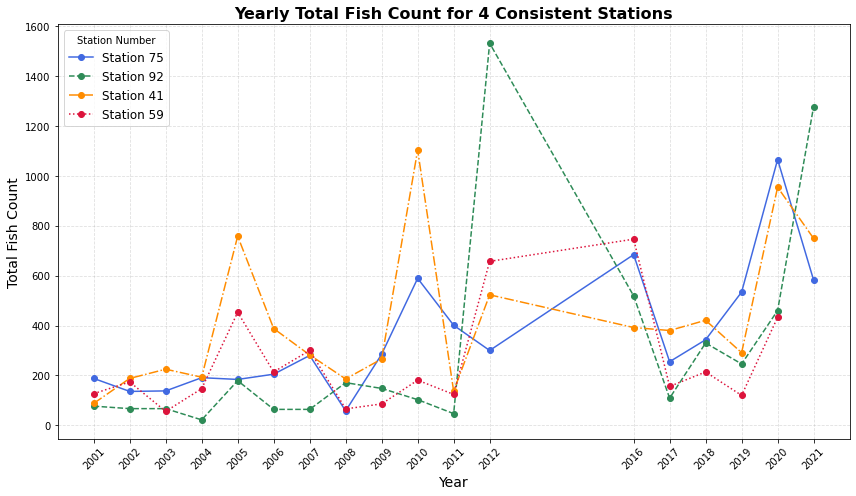

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)

# ÊéíÈô§Êï∞ÊçÆÁ®ÄÂ∞ëÁöÑÂπ¥‰ªΩ
df = df[~df['Year'].isin([2013, 2014, 2015])]

# ‰Ω†Êèê‰æõÁöÑ 4 ‰∏™ consistent station number
consistent_station_numbers = [75, 92, 41, 59]

# Á≠õÈÄâÊï∞ÊçÆ
df = df[df['Station Number'].isin(consistent_station_numbers)]

# ÂèØÈÄâÁöÑÈ¢úËâ≤ÂíåÁ∫øÂûãÈ£éÊ†º
colors = ['royalblue', 'seagreen', 'darkorange', 'crimson']
linestyles = ['-', '--', '-.', ':']

# ÁîªÂõæ
plt.figure(figsize=(12, 7))

for i, station in enumerate(consistent_station_numbers):
    df_station = df[df['Station Number'] == station]
    yearly_fish = df_station.groupby('Year')['Fish Count'].sum()
    
    # üîß ‰øùËØÅÊòØ1D numpy array
    x = yearly_fish.index.to_numpy()
    y = yearly_fish.to_numpy().flatten()

    plt.plot(
        x,
        y,
        marker='o',
        color=colors[i % len(colors)],
        linestyle=linestyles[i % len(linestyles)],
        label=f'Station {station}'
    )

# ÂõæË°®Ê†∑ÂºèÁæéÂåñ
plt.title('Yearly Total Fish Count for 4 Consistent Stations', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fish Count', fontsize=14)
plt.xticks(sorted(df['Year'].unique()), rotation=45)
plt.legend(title='Station Number', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


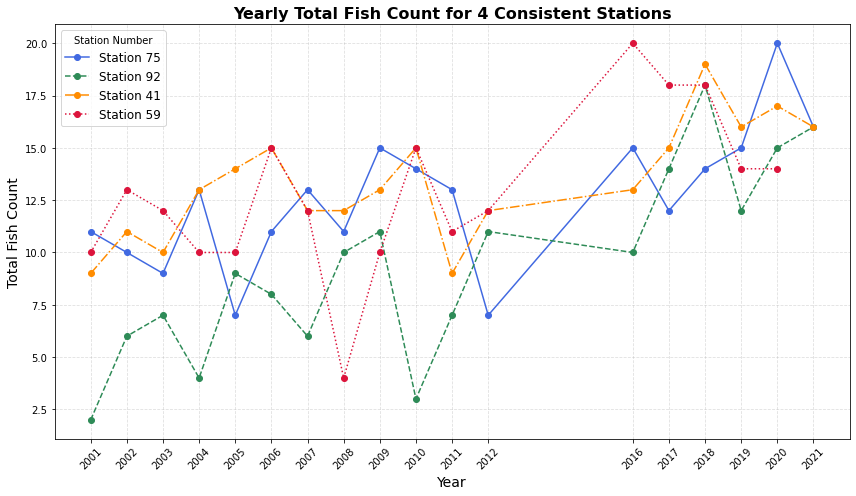

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)

# ÊéíÈô§Êï∞ÊçÆÁ®ÄÂ∞ëÁöÑÂπ¥‰ªΩ
df = df[~df['Year'].isin([2013, 2014, 2015])]

# ‰Ω†Êèê‰æõÁöÑ 4 ‰∏™ consistent station number
consistent_station_numbers = [75, 92, 41, 59]

# Á≠õÈÄâÊï∞ÊçÆ
df = df[df['Station Number'].isin(consistent_station_numbers)]

# ÂèØÈÄâÁöÑÈ¢úËâ≤ÂíåÁ∫øÂûãÈ£éÊ†º
colors = ['royalblue', 'seagreen', 'darkorange', 'crimson']
linestyles = ['-', '--', '-.', ':']

# ÁîªÂõæ
plt.figure(figsize=(12, 7))

for i, station in enumerate(consistent_station_numbers):
    df_station = df[df['Station Number'] == station]
    yearly_species = df_station.groupby('Year')['Species Count'].sum()
    
    # üîß ‰øùËØÅÊòØ1D numpy array
    x = yearly_species.index.to_numpy()
    y = yearly_species.to_numpy().flatten()

    plt.plot(
        x,
        y,
        marker='o',
        color=colors[i % len(colors)],
        linestyle=linestyles[i % len(linestyles)],
        label=f'Station {station}'
    )

# ÂõæË°®Ê†∑ÂºèÁæéÂåñ
plt.title('Yearly Total Fish Count for 4 Consistent Stations', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fish Count', fontsize=14)
plt.xticks(sorted(df['Year'].unique()), rotation=45)
plt.legend(title='Station Number', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


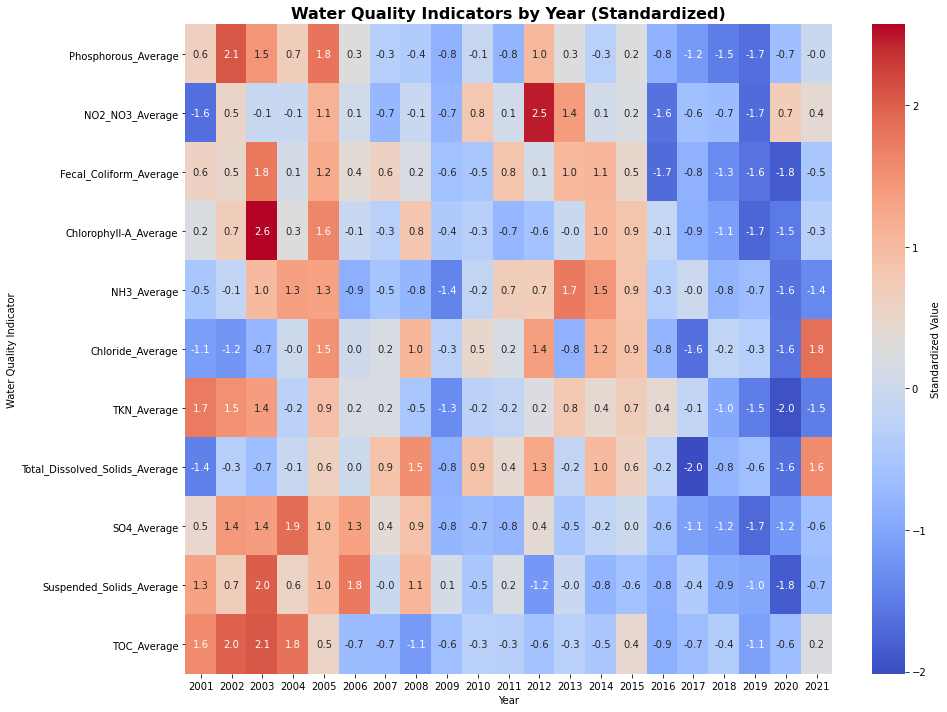

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('chemical_water_quality_cleaned.csv')
df = df[~df['Year'].isin([2022,2023,2024,2025])]

df['Year'] = df['Year'].astype(int)

# üîç Âè™‰øùÁïôÊ∞¥Ë¥®ÊåáÊ†áÔºö‰øùÁïôÂàóÂêç‰∏≠Âê´ "Average" ÁöÑÂàó
wq_columns = [col for col in df.columns if 'Average' in col]

# Âº∫Âà∂ËΩ¨Êç¢‰∏∫Êï∞ÂÄºÔºåÈÅøÂÖçËÑèÊï∞ÊçÆ
df[wq_columns] = df[wq_columns].apply(pd.to_numeric, errors='coerce')

# ÊØèÂπ¥Âπ≥ÂùáÂÄº
yearly_wq_avg = df.groupby('Year')[wq_columns].mean()

# Ê†áÂáÜÂåñ z-score
scaler = StandardScaler()
yearly_scaled = pd.DataFrame(
    scaler.fit_transform(yearly_wq_avg),
    index=yearly_wq_avg.index,
    columns=wq_columns
)

# ÁîªÁÉ≠ÂäõÂõæ
plt.figure(figsize=(14, 10))
sns.heatmap(yearly_scaled.T, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Standardized Value'})
plt.title('Water Quality Indicators by Year (Standardized)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Water Quality Indicator')
plt.tight_layout()
plt.show()


In [84]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.lines import Line2D

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')

# ÈùûÈ±ºÁ±ªÂàó
meta_and_chemical_cols = [
    'Fish Count', 'Species Count', 'Station Number', 'Station Name', 'Waterway', 'Year', 'x', 'y',
    'Phosphorous_Average', 'Phosphorous_Min', 'Phosphorous_Max',
    'NO2_NO3_Average', 'NO2_NO3_Min', 'NO2_NO3_Max',
    'Fecal_Coliform_Average', 'Fecal_Coliform_Min', 'Fecal_Coliform_Max',
    'Chlorophyll-A_Average', 'Chlorophyll-A_Min', 'Chlorophyll-A_Max',
    'NH3_Average', 'NH3_Min', 'NH3_Max',
    'Chloride_Average', 'Chloride_Min', 'Chloride_Max',
    'TKN_Average', 'TKN_Min', 'TKN_Max',
    'Total_Dissolved_Solids_Average', 'Total_Dissolved_Solids_Min', 'Total_Dissolved_Solids_Max',
    'SO4_Average', 'SO4_Min', 'SO4_Max',
    'Suspended_Solids_Average', 'Suspended_Solids_Min', 'Suspended_Solids_Max',
    'TOC_Average', 'TOC_Min', 'TOC_Max'
]
fish_columns = [col for col in df.columns if col not in meta_and_chemical_cols and not col.startswith('Unnamed')]

# ÊûÑÂª∫ÁΩëÁªú
G = nx.Graph()
co_occurrence = {}
fish_totals = {fish: 0 for fish in fish_columns}

for _, row in df.iterrows():
    present_fish = [fish for fish in fish_columns if row[fish] > 0]
    for fish1, fish2 in combinations(sorted(present_fish), 2):
        pair = tuple(sorted([fish1, fish2]))
        co_occurrence[pair] = co_occurrence.get(pair, 0) + 1
    for fish in present_fish:
        fish_totals[fish] += row[fish]

for fish, total_count in fish_totals.items():
    if total_count > 0:
        G.add_node(fish, size=total_count)

for (fish1, fish2), weight in co_occurrence.items():
    G.add_edge(fish1, fish2, weight=weight)

# Â∏ÉÂ±Ä
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=9.2, iterations=100, seed=42)

# Ëé∑Âèñ top 10 ÊúÄÁ≤óËæπ
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
top_edges = set((e[0], e[1]) for e in sorted_edges[:10])

# ËäÇÁÇπÂ§ßÂ∞è
node_sizes = [G.nodes[n]['size'] * 0.4 for n in G.nodes]

# ÂàÜ‰∏§ÊâπÁîªËæπ
regular_edges = [e for e in G.edges if tuple(sorted(e)) not in top_edges]
highlight_edges = [e for e in G.edges if tuple(sorted(e)) in top_edges]

# ËæπÂÆΩ
edge_widths_regular = [G.edges[e]['weight'] * 0.1 for e in regular_edges]
edge_widths_top = [G.edges[e]['weight'] * 0.06 for e in highlight_edges]

# ÁîªÂõæ
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=regular_edges, width=edge_widths_regular, edge_color='gray', alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, width=edge_widths_top, edge_color='darkorange', alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12)

# Âõæ‰æã
legend_elements = [
    Line2D([0], [0], color='darkorange', lw=5, label='Top 10 Co-occurrence'),
    Line2D([0], [0], color='gray', lw=5, label='Other Co-occurrence'),
    Line2D([0], [0], marker='o', color='w', label='Fish Species Node',
           markerfacecolor='skyblue', markersize=50)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12, frameon=True)

plt.title('Fish Co-occurrence Network\nOrange Edges = Top 10 Most Frequent Co-occurrences', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

‰πãÂêéË¶ÅÁªìÂêàÊ∞¥Ë¥®ÂÅöÂÖ±Áé∞ÁΩëÁªúÔºå‰æãÂ¶ÇÈ´òÊ±°Êüì‰∏ãÁöÑÁΩëÁªúÔºåÂíå‰ΩéÊ±°Êüì‰∏ãÁöÑÁΩëÁªúÂØπÊØî

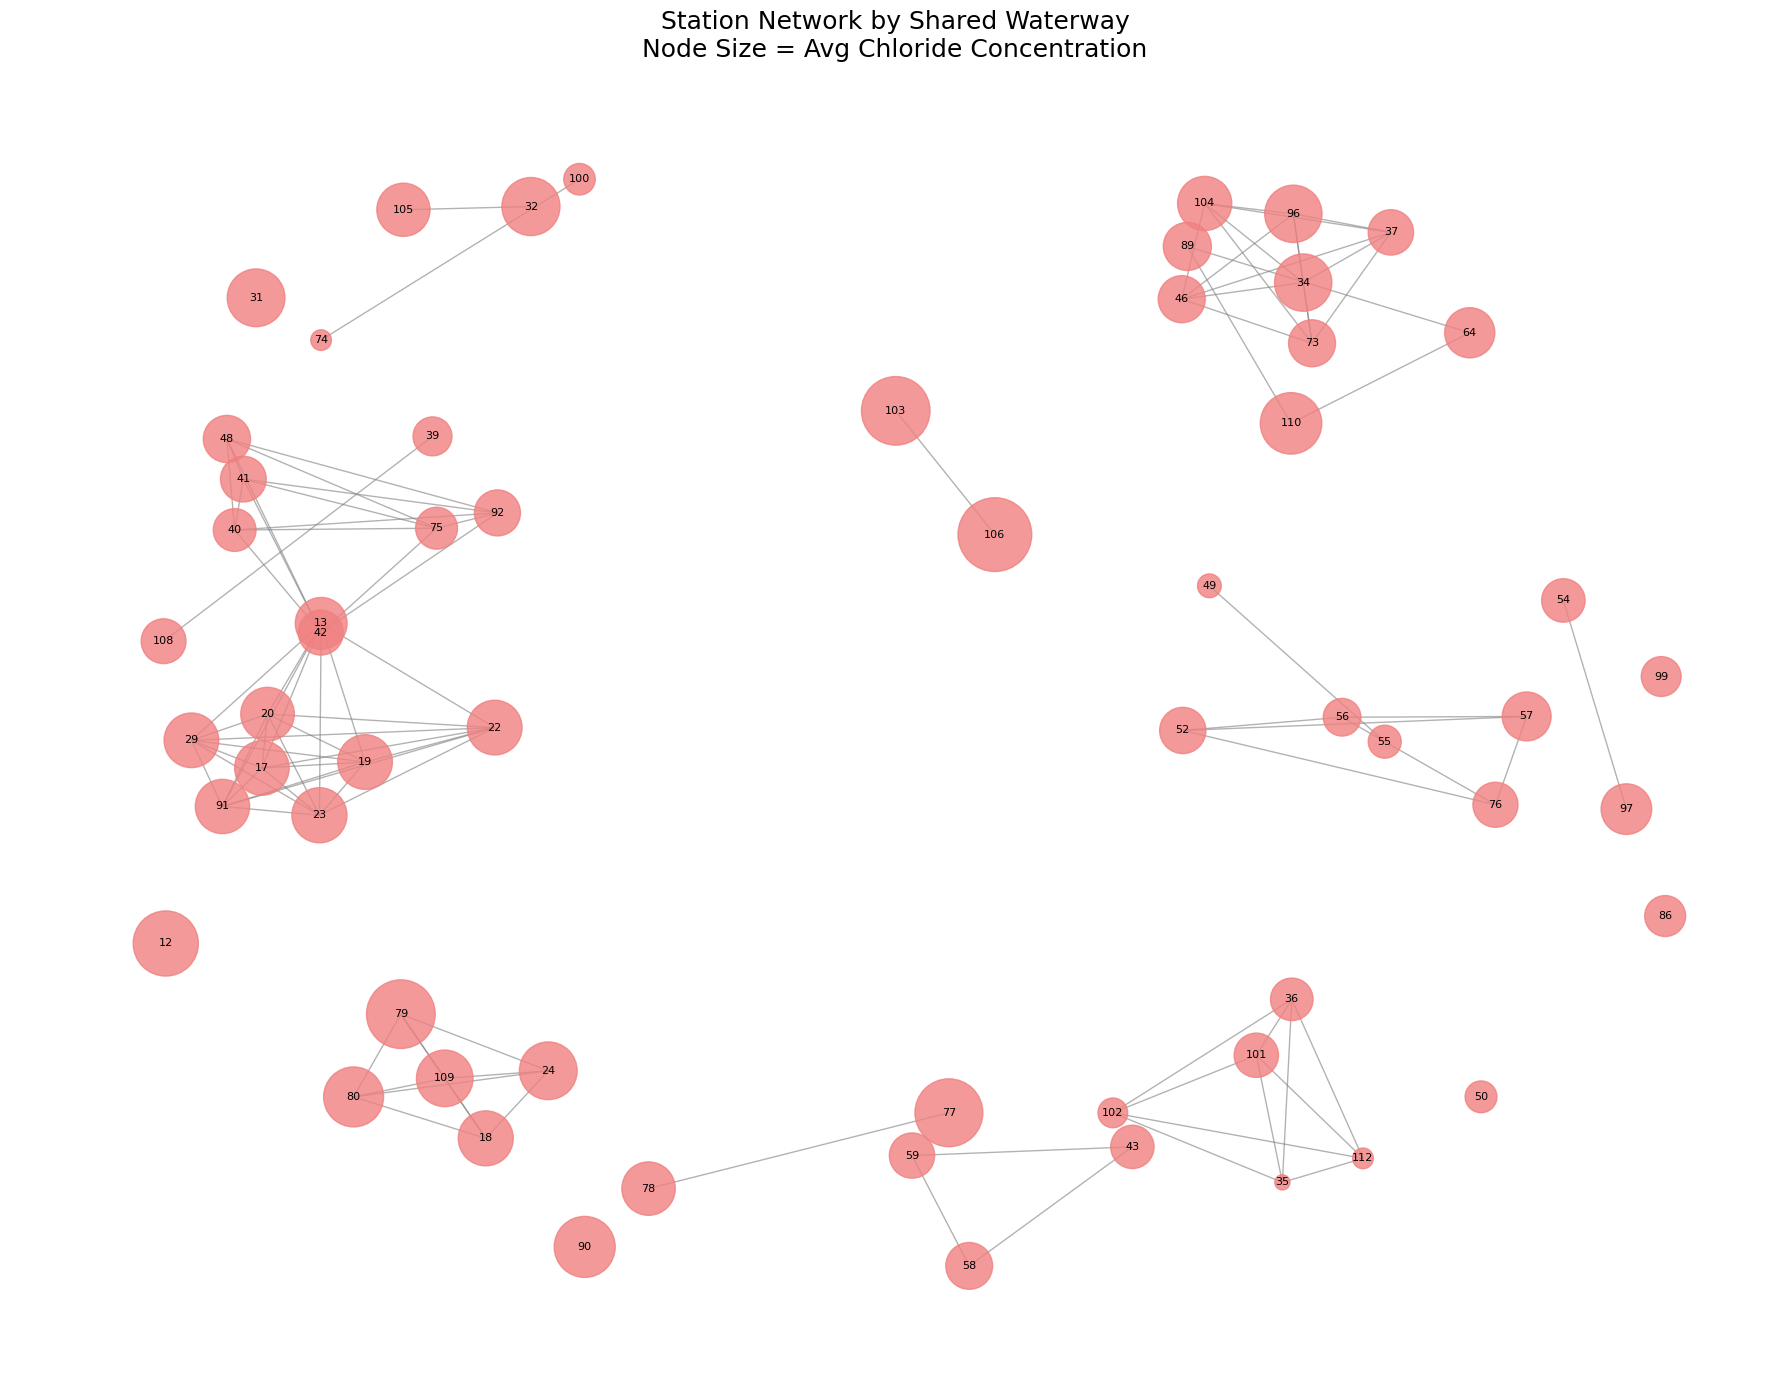

In [71]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')

# ‰øùËØÅÂ≠óÊÆµÊ†ºÂºè‰∏ÄËá¥
df['Station Number'] = df['Station Number'].astype(str)
df['Waterway'] = df['Waterway'].astype(str)

# Step 1: ËÆ°ÁÆóÊØè‰∏™Á´ôÁÇπÁöÑ Chloride_AverageÔºàÂèñÂπ≥ÂùáÔºâ
station_chloride = df.groupby('Station Number')['Chloride_Average'].mean().to_dict()

# Step 2: ÊûÑÂª∫ Waterway ‚Üí Station ÂàóË°®Â≠óÂÖ∏
waterway_station_map = df.groupby('Waterway')['Station Number'].unique().to_dict()

# Step 3: ÊûÑÂª∫ÂõæÔºàËøûÂêå‰∏ÄÊ∞¥ÈÅìÁöÑÊâÄÊúâÁ´ôÁÇπÔºâ
G = nx.Graph()

# Ê∑ªÂä†ËäÇÁÇπ
for station, chloride_value in station_chloride.items():
    if pd.notna(chloride_value):
        G.add_node(station, chloride=chloride_value)

# Ê∑ªÂä†ËæπÔºöÂêå‰∏ÄÊ≤≥ÈÅì‰∏≠ÁöÑ‰ªªÊÑè‰∏§Á´ôÁÇπÁõ∏Ëøû
for station_list in waterway_station_map.values():
    stations = list(set(station_list))  # Èò≤ÈáçÂ§ç
    for i in range(len(stations)):
        for j in range(i+1, len(stations)):
            if G.has_node(stations[i]) and G.has_node(stations[j]):
                G.add_edge(stations[i], stations[j])

# ÂèØËßÜÂåñ
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, k=1, iterations=100, seed=42)

# ËäÇÁÇπÂ§ßÂ∞èÊåâ chloride ÂÄºÁº©Êîæ
node_sizes = [G.nodes[n]['chloride'] * 8 for n in G.nodes]

# ÁªòÂõæ
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightcoral', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Station Network by Shared Waterway\nNode Size = Avg Chloride Concentration', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
from numpy.core import getlimits
np.MachAr = getlimits.MachAr
import pandas as pd


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# 1. Load data
df = pd.read_csv('combined_df_expanded_species.csv')

# 2. (Optional) drop sparse years
# df = df[~df['Year'].isin([2013, 2014, 2015])]

# 3. Drop missing Fish Count
df = df.dropna(subset=['Fish Count'])

# 4. Select predictors
predictors = [col for col in df.columns if col.endswith('_Average')]

# 5. Drop any rows missing predictors
df = df.dropna(subset=predictors)

# 6. Standardize predictors
scaler = StandardScaler()
X = scaler.fit_transform(df[predictors])
y = df['Fish Count'].values

# 7. Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 8. Output results
print(f"R¬≤: {r2_score(y, y_pred):.3f}")
print(f"Intercept: {model.intercept_:.3f}\n")
print("Coefficients:")
for feat, coef in zip(predictors, model.coef_):
    print(f"  {feat:<25} {coef:>8.3f}")


R¬≤: 0.211
Intercept: 182.062

Coefficients:
  Phosphorous_Average         36.573
  NO2_NO3_Average            -26.718
  Fecal_Coliform_Average      16.058
  Chlorophyll-A_Average       10.391
  NH3_Average                 34.816
  Chloride_Average           -14.406
  TKN_Average                -38.236
  Total_Dissolved_Solids_Average  -31.349
  SO4_Average                  8.071
  Suspended_Solids_Average   -56.997
  TOC_Average                -40.255


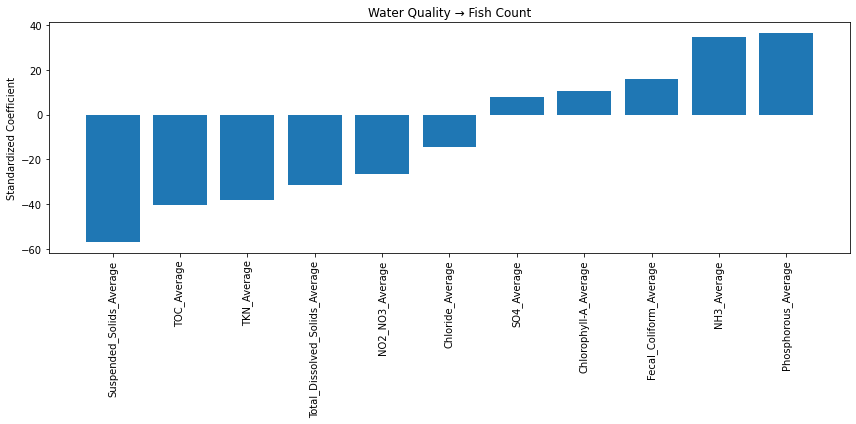

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === USER: set your local path to the merged dataset ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. Load data
df = pd.read_csv(DATA_PATH)

# 2. (Optional) drop sparse years
# df = df[~df['Year'].isin([2013, 2014, 2015])]

# 3. Clean: drop missing Fish Count or predictors
df = df.dropna(subset=['Fish Count'])
predictors = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=predictors)

# 4. Standardize predictors
scaler = StandardScaler()
X = scaler.fit_transform(df[predictors])
y = df['Fish Count'].values

# 5. Fit model
model = LinearRegression().fit(X, y)

# 6. Extract & sort coefficients
coef = pd.Series(model.coef_, index=predictors).sort_values()

# 7. Plot
plt.figure(figsize=(12,6))
plt.bar(coef.index, coef.values)
plt.xticks(rotation=90)
plt.ylabel('Standardized Coefficient')
plt.title('Water Quality ‚Üí Fish Count')
plt.tight_layout()
plt.show()


Random Forest R¬≤: 0.890
Random Forest RMSE: 78.625


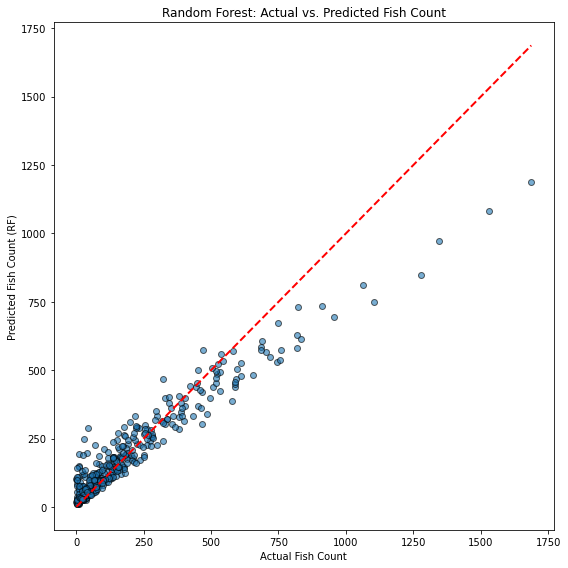

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# === USER: set your local path to the merged dataset ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. Load data
df = pd.read_csv(DATA_PATH)

# 2. Drop missing Fish Count or predictors
df = df.dropna(subset=['Fish Count'])
predictors = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=predictors)

# 3. Standardize predictors
scaler = StandardScaler()
X = scaler.fit_transform(df[predictors])
y = df['Fish Count'].values

# 4. Fit a Random Forest Regressor (non-linear model)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred = rf.predict(X)

# 5. Evaluate
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
print(f"Random Forest R¬≤: {r2:.3f}")
print(f"Random Forest RMSE: {rmse:.3f}")

# 6. Plot actual vs. predicted
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Fish Count')
plt.ylabel('Predicted Fish Count (RF)')
plt.title('Random Forest: Actual vs. Predicted Fish Count')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)

# 2. Evaluate
from sklearn.metrics import r2_score, mean_squared_error
print("Test  R¬≤:", r2_score(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

# Or use cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("5-fold CV R¬≤ mean:", cv_scores.mean())


Test  R¬≤: 0.2750970357874689
Test RMSE: 226.7625959146534
5-fold CV R¬≤ mean: -0.4009941104249625


In [14]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=predictors).sort_values(ascending=False)
print(feat_imp)


Suspended_Solids_Average          0.186373
Chloride_Average                  0.144146
Fecal_Coliform_Average            0.137516
Total_Dissolved_Solids_Average    0.118628
NO2_NO3_Average                   0.086718
SO4_Average                       0.085425
Phosphorous_Average               0.069208
NH3_Average                       0.065648
Chlorophyll-A_Average             0.055777
TOC_Average                       0.040864
TKN_Average                       0.009696
dtype: float64


Suspended_Solids_Average          0.186373
Chloride_Average                  0.144146
Fecal_Coliform_Average            0.137516
Total_Dissolved_Solids_Average    0.118628
NO2_NO3_Average                   0.086718
SO4_Average                       0.085425
Phosphorous_Average               0.069208
NH3_Average                       0.065648
Chlorophyll-A_Average             0.055777
TOC_Average                       0.040864
dtype: float64


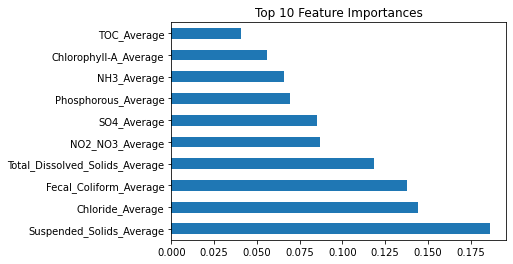

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=predictors).sort_values(ascending=False)
print(feat_imp.head(10))
feat_imp.head(10).plot.barh(title="Top 10 Feature Importances")
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# === ËØ∑Â∞Ü‰∏ãÈù¢Ë∑ØÂæÑÊõøÊç¢‰∏∫‰Ω†ÁöÑÊú¨Âú∞Êñá‰ª∂Ë∑ØÂæÑ ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. ËΩΩÂÖ•Êï∞ÊçÆ
df = pd.read_csv(DATA_PATH)

# 2. Ê∏ÖÊ¥óÔºöÂéªÈô§ Fish Count ÊàñÂÖ≥ÈîÆÈ¢ÑÊµãÂèòÈáèÁº∫Â§±ÁöÑË°å
df = df.dropna(subset=['Fish Count',
    'Suspended_Solids_Average', 'Chloride_Average', 'Fecal_Coliform_Average',
    'Total_Dissolved_Solids_Average', 'NO2_NO3_Average'
])

# 3. ÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ
X = df[['Suspended_Solids_Average', 'Chloride_Average', 'Fecal_Coliform_Average',
        'Total_Dissolved_Solids_Average', 'NO2_NO3_Average']]
y = df['Fish Count']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Ê†áÂáÜÂåñ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Ridge ÂõûÂΩíÔºàÂÜÖÁΩÆ 5 Êäò CV ÈÄâ Œ±Ôºâ
ridge = RidgeCV(alphas=[0.1, 1, 10, 100], cv=5).fit(X_train_scaled, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test_scaled))

# 6. ÈöèÊú∫Ê£ÆÊûóÔºàÂêåÊ†∑Âè™Áî®Ëøô‰∫î‰∏™ÂèòÈáèÔºâ
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
rf_r2 = r2_score(y_test, rf.predict(X_test_scaled))

print(f"Ridge (top5) Test R¬≤: {ridge_r2:.3f}")
print(f"RF (top5)    Test R¬≤: {rf_r2:.3f}")


Ridge (top5) Test R¬≤: 0.167
RF (top5)    Test R¬≤: 0.198


In [27]:
import pandas as pd

# 1. Load the existing CSV
path = 'combined_df_expanded_species.csv'
df = pd.read_csv(path)

# 2. Rename columns: replace 'Chlorophyll-A' with 'Chlorophyll_A'
df.columns = [col.replace('Chlorophyll-A', 'Chlorophyll_A') for col in df.columns]

# 3. Save back to the same file
df.to_csv(path, index=False)

# 4. Report back
print("Columns successfully updated. Here are the new column names:")
print([col for col in df.columns if 'Chlorophyll_A' in col])


Columns successfully updated. Here are the new column names:
['Chlorophyll_A_Average', 'Chlorophyll_A_Min', 'Chlorophyll_A_Max']


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

# === USER: update path to your local file ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. Load data
df = pd.read_csv(DATA_PATH)

# 2. Clean: drop rows missing Fish Count or any average chemical
df = df.dropna(subset=['Fish Count'])
chemical_avg = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=chemical_avg)

# 3. Rename columns to avoid formula parsing issues
df.columns = df.columns.str.replace('-', '_')

# 4. Reset index to ensure contiguous indexing
df = df.reset_index(drop=True)

# 5. Standardize chemical predictors
scaler = StandardScaler()
df[chemical_avg] = scaler.fit_transform(df[chemical_avg])

# 6. Prepare grouping variable
df['Station'] = df['Station Number'].astype('category')

# 7. Build formula
fixed_effects = ' + '.join(chemical_avg)
formula = f'Q("Fish Count") ~ {fixed_effects}'

# 8. Fit mixed effects model
md = smf.mixedlm(formula, df, groups=df['Station'])
mdf = md.fit(reml=False)

# 9. Print summary
print(mdf.summary())



                    Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      Q("Fish Count")
No. Observations:       417          Method:                  ML             
No. Groups:             60           Scale:                   36389.4258     
Min. group size:        2            Log-Likelihood:          -2806.4942     
Max. group size:        19           Converged:               Yes            
Mean group size:        7.0                                                  
-----------------------------------------------------------------------------
                                Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                       159.554   16.638  9.590 0.000 126.943 192.165
Phosphorous_Average              34.568   20.248  1.707 0.088  -5.118  74.253
NO2_NO3_Average                 -24.785   21.293 -1.164 0.244 -66.518  16.949
Fecal_

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# === USER: set this to your local CSV path ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. load data
df = pd.read_csv(DATA_PATH)

# 2. filter out years 2013-2015 and drop missing
df = df[~df['Year'].isin([2013, 2014, 2015])]
df = df.dropna(subset=['Fish Count'])
chem_avgs = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=chem_avgs + ['Station Number'])

# 3. standardize predictors
scaler = StandardScaler()
df[chem_avgs] = scaler.fit_transform(df[chem_avgs])

# 4. prepare stations list
stations = [75, 92, 41, 59]

# 5. loop over stations
for st in stations:
    sub = df[df['Station Number'] == st]
    X = sub[chem_avgs].values
    y = sub['Fish Count'].values
    
    # fit sklearn linear model
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # print results
    print(f"\nStation {st} (n={len(y)}):")
    print(f"  R¬≤ = {r2:.3f}")
    print(f"  Intercept = {model.intercept_:.3f}")
    print("  Coefficients:")
    for feat, coef in zip(chem_avgs, model.coef_):
        print(f"    {feat:<30} {coef:>8.3f}")



Station 75 (n=18):
  R¬≤ = 0.832
  Intercept = -1612.649
  Coefficients:
    Phosphorous_Average            -929.932
    NO2_NO3_Average                 408.054
    Fecal_Coliform_Average         -3506.876
    Chlorophyll_A_Average           -13.020
    NH3_Average                    -105.085
    Chloride_Average               -574.077
    TKN_Average                       0.055
    Total_Dissolved_Solids_Average  278.435
    SO4_Average                     790.175
    Suspended_Solids_Average        -30.406
    TOC_Average                     -83.010

Station 92 (n=18):
  R¬≤ = 0.837
  Intercept = -1138.085
  Coefficients:
    Phosphorous_Average            1519.842
    NO2_NO3_Average                -693.000
    Fecal_Coliform_Average         -1625.268
    Chlorophyll_A_Average          -595.546
    NH3_Average                    -217.894
    Chloride_Average               1165.494
    TKN_Average                    -161.819
    Total_Dissolved_Solids_Average -460.196
    SO4_Averag

/Users/sys/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sys/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sys/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/sys/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/U

Best Params: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Test R¬≤: 0.358443324004613
Test RMSE: 213.32855738760915


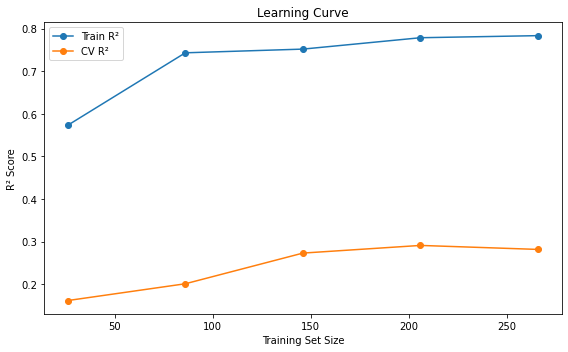

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# === USER: ‰øÆÊîπ‰∏∫‰Ω†Êú¨Âú∞ÁöÑË∑ØÂæÑ ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. ËΩΩÂÖ•Âπ∂Ê∏ÖÊ¥ó
df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=['Fish Count'])
predictors = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=predictors)

# 2. ÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ
X = df[predictors].values
y = df['Fish Count'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Ê†áÂáÜÂåñ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. ÈöèÊú∫ÊêúÁ¥¢Ë∞ÉÂèÇ
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 0.5, 0.8]
}
rf = RandomForestRegressor(random_state=42)
rs = RandomizedSearchCV(
    rf, param_dist,
    n_iter=20, cv=5,
    scoring='r2', n_jobs=-1, random_state=42
)
rs.fit(X_train, y_train)
best = rs.best_estimator_

# 5. ÊµãËØïÈõÜËØÑ‰º∞
y_pred = best.predict(X_test)
print("Best Params:", rs.best_params_)
print("Test R¬≤:", r2_score(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# 6. Â≠¶‰π†Êõ≤Á∫øÊ£ÄÊü•ËøáÊãüÂêà
train_sizes, train_scores, val_scores = learning_curve(
    best, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='r2', n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Train R¬≤')
plt.plot(train_sizes, val_mean, 'o-', label='CV R¬≤')
plt.xlabel('Training Set Size')
plt.ylabel('R¬≤ Score')
plt.title('Learning Curve')
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}
rs = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist, n_iter=30, cv=5,
    scoring='r2', n_jobs=-1, random_state=42,
    error_score='raise'
)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='r2')

In [36]:
# ÊúÄ‰ºòÂèÇÊï∞
print("Best params:", rs.best_params_)

# ÊúÄ‰ºòÁöÑ‰∫§ÂèâÈ™åËØÅÂæóÂàÜÔºàR¬≤Ôºâ
print("Best CV R¬≤:", rs.best_score_)


Best params: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Best CV R¬≤: 0.2773564004591358


In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# === USER: set this to your local CSV path ===
DATA_PATH = 'combined_df_expanded_species.csv'

# 1. Load data
df = pd.read_csv(DATA_PATH)

# 2. Prepare target and predictors
df = df.dropna(subset=['Species Count'])
chem_avg = [c for c in df.columns if c.endswith('_Average')]
df = df.dropna(subset=chem_avg)

X = df[chem_avg].values
y = df['Species Count'].values

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 6. Permutation Importance
perm_imp = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
imp_df = pd.DataFrame({
    'feature': chem_avg,
    'importance': perm_imp.importances_mean
}).sort_values('importance', ascending=False)

# 7. Partial Dependence to get direction (+/-)
directions = {}
for i, feature in enumerate(chem_avg):
    # compute PDP at 25th and 75th percentiles
    q_low, q_high = np.percentile(X_test_scaled[:, i], [25, 75])
    pdp_low = rf.predict(np.array(X_test_scaled.mean(axis=0)).reshape(1, -1) + 0*(X_test_scaled[0]))
    # Create samples where only this feature varies
    sample = X_test_scaled.mean(axis=0).reshape(1, -1)
    sample_low = sample.copy()
    sample_low[0, i] = q_low
    sample_high = sample.copy()
    sample_high[0, i] = q_high
    pred_low = rf.predict(sample_low)
    pred_high = rf.predict(sample_high)
    directions[feature] = 'positive' if pred_high > pred_low else 'negative'

# 8. Combine results
imp_df['direction'] = imp_df['feature'].map(directions)

# Display results
import pprint
print("Feature importance and direction:")
pprint.pprint(imp_df.reset_index(drop=True))


Feature importance and direction:
                           feature  importance direction
0   Total_Dissolved_Solids_Average    0.219989  negative
1           Fecal_Coliform_Average    0.100323  negative
2                      TOC_Average    0.070481  negative
3                      NH3_Average    0.061762  negative
4         Suspended_Solids_Average    0.037607  positive
5            Chlorophyll_A_Average    0.016958  positive
6                      TKN_Average    0.015697  negative
7                  NO2_NO3_Average    0.015694  positive
8                      SO4_Average    0.014241  positive
9                 Chloride_Average    0.009569  negative
10             Phosphorous_Average   -0.012592  positive


In [2]:
import pandas as pd

# Load the main dataset
df = pd.read_csv('combined_df_expanded_species.csv')

# Ensure numeric types for pollutants
pollutants = ['Suspended_Solids_Average', 'TOC_Average', 'Total_Dissolved_Solids_Average']
for p in pollutants:
    df[p] = pd.to_numeric(df[p], errors='coerce')

# 1. Êü•ÁúãÂü∫Êú¨ÁªüËÆ°ÈáèÔºåÂà§Êñ≠ÁªìÊûúËåÉÂõ¥ÊòØÂê¶ÂêàÁêÜ
print(df[pollutants].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# 2. ‰ª• Suspended Solids ÂõõÂàÜ‰ΩçÊï∞ÂàÜÁªÑ
q1 = df['Suspended_Solids_Average'].quantile(0.25)
q3 = df['Suspended_Solids_Average'].quantile(0.75)
df['SS_group'] = pd.cut(
    df['Suspended_Solids_Average'],
    bins=[-float('inf'), q1, q3, float('inf')],
    labels=['Low SS', 'Mid SS', 'High SS']
)

# 3. ÊåâÂπ¥‰ªΩÂíåÁªÑÂà´ÁªüËÆ° station-year Êï∞ÈáèÔºåÊ£ÄÊü•ÂàÜÂ∏É
distribution = df.groupby(['Year', 'SS_group']).size().unstack(fill_value=0)
print(distribution)


                                      mean         std    min    25%    50%  \
Suspended_Solids_Average         17.873206   11.040397    1.0   10.0   15.0   
TOC_Average                       5.794258    2.892273    1.0    4.0    5.0   
Total_Dissolved_Solids_Average  631.606715  167.055837  220.0  538.0  627.0   

                                  75%     max  
Suspended_Solids_Average         23.0    89.0  
TOC_Average                       7.0    43.0  
Total_Dissolved_Solids_Average  723.0  1409.0  
SS_group  Low SS  Mid SS  High SS
Year                             
2001           4      16        7
2002           3      15        4
2003           7       5       12
2004           4      13       11
2005           4      15        8
2006           4      13        6
2007           6      13        6
2008           5       9       15
2009           6      16        5
2010          11      12        1
2011           6      11        6
2012           8      15        4
2013           

In [21]:
import pandas as pd

df = pd.read_csv('combined_df_expanded_species.csv')
# Á°Æ‰øùÊï∞ÂÄºÂûã
df['Suspended_Solids_Average'] = pd.to_numeric(df['Suspended_Solids_Average'], errors='coerce')
# ÊåâÂõõÂàÜ‰ΩçÂàÜÁªÑ
q1 = df['Suspended_Solids_Average'].quantile(0.25)
q3 = df['Suspended_Solids_Average'].quantile(0.75)
df['SS_group'] = pd.cut(df['Suspended_Solids_Average'],
                        bins=[-float('inf'), q1, q3, float('inf')],
                        labels=['Low SS', 'Mid SS', 'High SS'])

# Êü•ÁúãÂêÑÁªÑ Fish Count ÂàÜÂ∏É
groups = df.groupby('SS_group')['Fish Count']
print("Fish Count by SS Group:\n", groups.describe())

# ÊâæÂá∫ Fish Count Êé•Ëøë 300 ÁöÑËÆ∞ÂΩï
target = 100
tolerance = 10  # ÂèØË∞ÉÊï¥
matches = df[(df['Fish Count'].between(target-tolerance, target+tolerance))]
print(f"\nStation‚Äìyear with Fish Count ‚âà {target} (¬±{tolerance}):\n", 
      matches[['Year','Station Number','SS_group','Fish Count']])


Fish Count by SS Group:
           count        mean         std  min     25%    50%     75%     max
SS_group                                                                   
Low SS    110.0  330.272727  304.389023  1.0  102.25  234.0  493.75  1531.0
Mid SS    209.0  161.961722  215.829323  2.0   31.00   77.0  205.00  1687.0
High SS    99.0   67.191919   68.626864  1.0   20.00   46.0   95.00   452.0

Station‚Äìyear with Fish Count ‚âà 100 (¬±10):
      Year  Station Number SS_group  Fish Count
28   2002              18   Mid SS         104
68   2003              58  High SS          95
138  2006              39   Mid SS          99
169  2007              49   Low SS         102
194  2008              77  High SS         107
197  2008              64  High SS          90
198  2008              12  High SS          95
237  2010              92   Low SS         103
268  2011              58  High SS         101
271  2011              46   Mid SS          95
311  2013              96  Hi

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv('combined_df_expanded_species.csv')

# Compute Suspended Solids groups (Low, Mid, High) based on quartiles
df['Suspended_Solids_Average'] = pd.to_numeric(df['Suspended_Solids_Average'], errors='coerce')
q_low = df['Suspended_Solids_Average'].quantile(0.25)
q_high = df['Suspended_Solids_Average'].quantile(0.75)
df['SS_group'] = pd.cut(
    df['Suspended_Solids_Average'],
    bins=[-float('inf'), q_low, q_high, float('inf')],
    labels=['Low SS', 'Mid SS', 'High SS']
)

# Identify stations that appear in all three SS_group categories
station_group_counts = df.groupby('Station Number')['SS_group'].nunique()
stations_three = station_group_counts[station_group_counts == 3].index.tolist()

# Display the stations and their group memberships
print("Stations recorded in all three SS groups:")
for st in stations_three:
    groups = df[df['Station Number'] == st]['SS_group'].unique()
    print(f"Station {st}: {list(groups)}")


Stations recorded in all three SS groups:
Station 56: ['High SS', 'Mid SS', 'Low SS']


In [29]:
import pandas as pd

# 1. Load the dataset (adjust path as needed)
df = pd.read_csv('combined_df_expanded_species.csv')

# 2. Ensure Suspended Solids is numeric and compute SS_group by quartiles
df['Suspended_Solids_Average'] = pd.to_numeric(df['Suspended_Solids_Average'], errors='coerce')
q_low = df['Suspended_Solids_Average'].quantile(0.25)
q_high = df['Suspended_Solids_Average'].quantile(0.75)
df['SS_group'] = pd.cut(
    df['Suspended_Solids_Average'],
    bins=[-float('inf'), q_low, q_high, float('inf')],
    labels=['Low SS', 'Mid SS', 'High SS']
)

# 3. Filter for Station 56 and select Year, SS_group, and Fish Count
station_56 = (
    df[df['Station Number'] == 56]
    [['Year', 'SS_group', 'Fish Count']]
    .sort_values('Year')
)

# 4. Display the result
print("Station 56 ‚Äî SS Group and Fish Count by Year:")
print(station_56.to_string(index=False))


Station 56 ‚Äî SS Group and Fish Count by Year:
 Year SS_group  Fish Count
 2003  High SS         452
 2007   Mid SS         322
 2011   Mid SS         507
 2014   Mid SS        1344
 2016   Mid SS         517
 2017   Mid SS         443
 2018   Mid SS         447
 2019   Low SS         331
 2020   Low SS         685


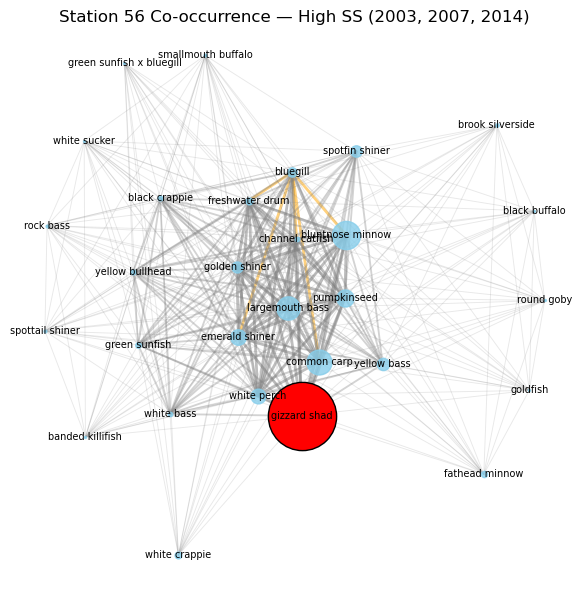

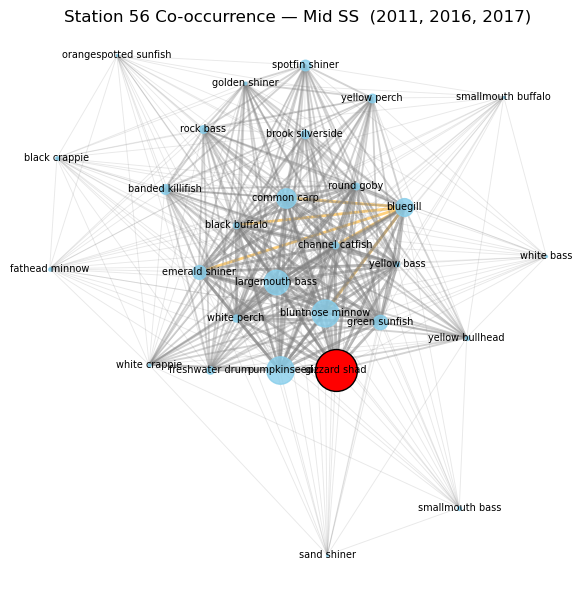

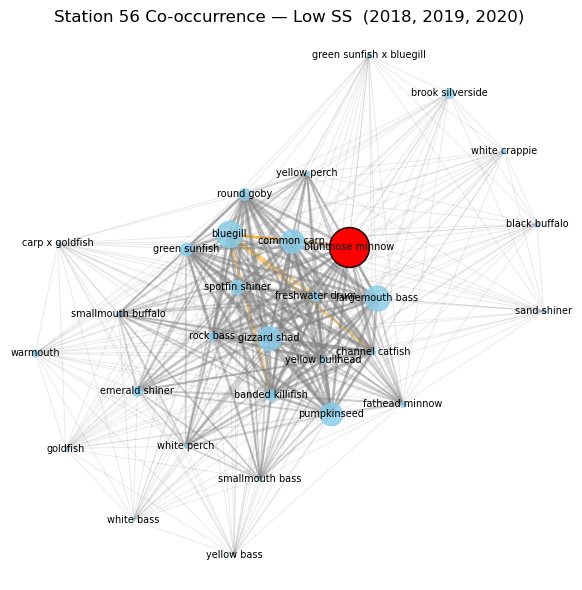

In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# 1. ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)
df['Station Number'] = df['Station Number'].astype(int)

# 2. Ëá™Âä®ËØÜÂà´È±ºÁßçÂàóÔºöTOC_Max ÂêéÈù¢ÁöÑÊâÄÊúâÂàó
cols = df.columns.tolist()
toc_max_idx = cols.index('TOC_Max')
fish_cols = cols[toc_max_idx+1:]

# 3. ÊûÑÂª∫ÂÖ±Áé∞ÁΩëÁªúÂáΩÊï∞
def build_cooccurrence_network(subdf, fish_columns):
    G = nx.Graph()
    co, totals = {}, {fish:0 for fish in fish_columns}
    for _, row in subdf.iterrows():
        present = [f for f in fish_columns if row[f] > 0]
        for f1, f2 in combinations(sorted(present), 2):
            co[(f1, f2)] = co.get((f1, f2), 0) + 1
        for f in present:
            totals[f] += row[f]
    for fish, cnt in totals.items():
        if cnt > 0:
            G.add_node(fish, abundance=cnt)
    for (f1, f2), w in co.items():
        G.add_edge(f1, f2, weight=w)
    return G

# 4. ÁªòÂõæÂáΩÊï∞ÔºöÁôΩÂ∫ï„ÄÅÂä†ÊùÉÁ™ÅÂá∫„ÄÅÂâç5ËæπÊ©ôËâ≤È´ò‰∫Æ„ÄÅÊúÄÂ§ßËäÇÁÇπÁ∫¢Ëâ≤
plt.style.use('default')
def plot_cooccurrence_network(G, title, k=0.8):
    # Â∏ÉÂ±Ä
    pos = nx.spring_layout(G, k=k, iterations=100, seed=42)
    # ËæπÊùÉÈáçÂàóË°®
    edges_data = list(G.edges(data=True))
    weights = [d['weight'] for _,_,d in edges_data]
    max_w = max(weights) if weights else 1

    # Ââç 5 Êù°ÊúÄÈáçÁöÑËæπ (Âè™‰øùÁïô (u,v))
    sorted_edges = sorted(edges_data, key=lambda x: x[2]['weight'], reverse=True)
    top5 = set((u, v) for u, v, _ in sorted_edges[:5])

    # ËäÇÁÇπÂ±ûÊÄß
    abundances = nx.get_node_attributes(G, 'abundance')
    max_node = max(abundances, key=abundances.get)

    # ÁªòÂõæ
    fig, ax = plt.subplots(figsize=(6,6), facecolor='white')
    ax.set_axis_off()
    ax.set_facecolor('white')

    # ÁîªËæπ
    for u, v, d in edges_data:
        w = d['weight']
        lw = (w / max_w) * 2 + 0
        alpha = (w / max_w) * 0.5 + 0.01
        color = 'orange' if (u, v) in top5 or (v, u) in top5 else 'gray'
        ax.plot(
            [pos[u][0], pos[v][0]],
            [pos[u][1], pos[v][1]],
            linewidth=lw,
            color=color,
            alpha=alpha,
            zorder=1
        )

    # ÁîªËäÇÁÇπ
    for n, cnt in abundances.items():
        size = cnt * 2
        if n == max_node:
            ax.scatter(
                pos[n][0], pos[n][1],
                s=size,
                c='red',
                edgecolors='black',
                linewidths=1.0,
                zorder=2
            )
        else:
            ax.scatter(
                pos[n][0], pos[n][1],
                s=size,
                c='skyblue',
                alpha=0.8,
                zorder=2
            )

    # Ê∑ªÂä†Ê†áÁ≠æ
    for n in G.nodes():
        ax.text(
            pos[n][0], pos[n][1],
            n,
            fontsize=7,
            ha='center', va='center',
            zorder=3
        )

    # Ê†áÈ¢ò
    ax.set_title(title, fontsize=12)
    plt.tight_layout()
    fig.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

# 5. ÂÆö‰πâ‰∏â‰∏™Âπ¥‰ªΩÁªÑÔºåÂØπÂ∫î‰∏âÁßçÊ∞¥Ë¥®
year_groups = {
    'High SS (2003, 2007, 2014)': [2003, 2007, 2014],
    'Mid SS  (2011, 2016, 2017)': [2011, 2016, 2017],
    'Low SS  (2018, 2019, 2020)': [2018, 2019, 2020],
}

# 6. Âú® Station 56 ‰∏äÁªòÂà∂‰∏âÂº†ÁΩëÁªúÂõæ
for label, years in year_groups.items():
    subdf = df[
        (df['Station Number'] == 56) &
        (df['Year'].isin(years))
    ]
    G = build_cooccurrence_network(subdf, fish_cols)
    plot_cooccurrence_network(
        G,
        title=f"Station 56 Co-occurrence ‚Äî {label}",
        k=0.9
    )


In [55]:
import pandas as pd

# ËØªÂèñÊï∞ÊçÆÔºàËØ∑Ê†πÊçÆÂÆûÈôÖË∑ØÂæÑ‰øÆÊîπÔºâ
df = pd.read_csv('combined_df_expanded_species.csv')

# Á≠õÈÄâ Station 56ÔºåÂπ∂ÊåâÂπ¥‰ªΩÊòæÁ§∫ Suspended Solids Âπ≥ÂùáÂÄº
station_56_ss = (
    df[df['Station Number'] == 56]
    [['Year', 'Suspended_Solids_Average']]
    .sort_values('Year')
)

print("Station 56 Suspended Solids (Average) by Year:")
print(station_56_ss.to_string(index=False))


Station 56 Suspended Solids (Average) by Year:
 Year  Suspended_Solids_Average
 2003                      30.0
 2007                      22.0
 2011                      12.0
 2014                      17.0
 2016                      14.0
 2017                      12.0
 2018                      11.0
 2019                       9.0
 2020                       7.0


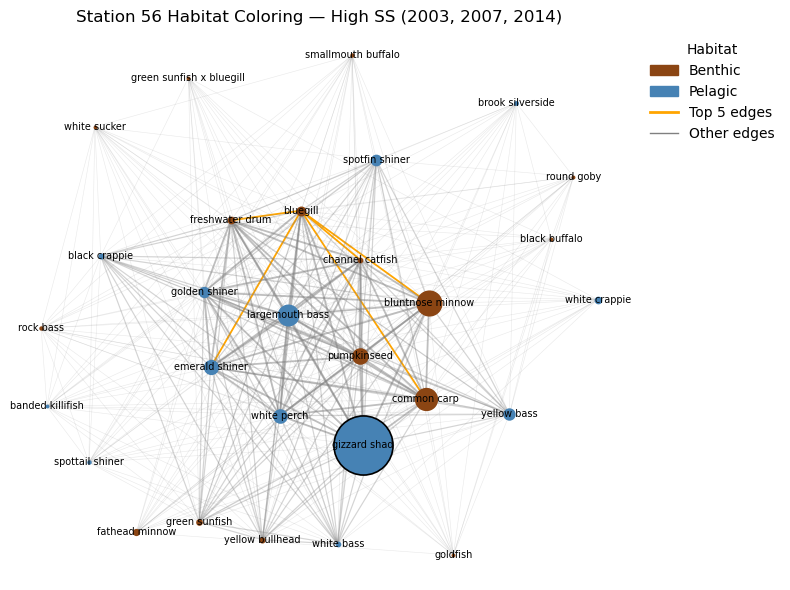

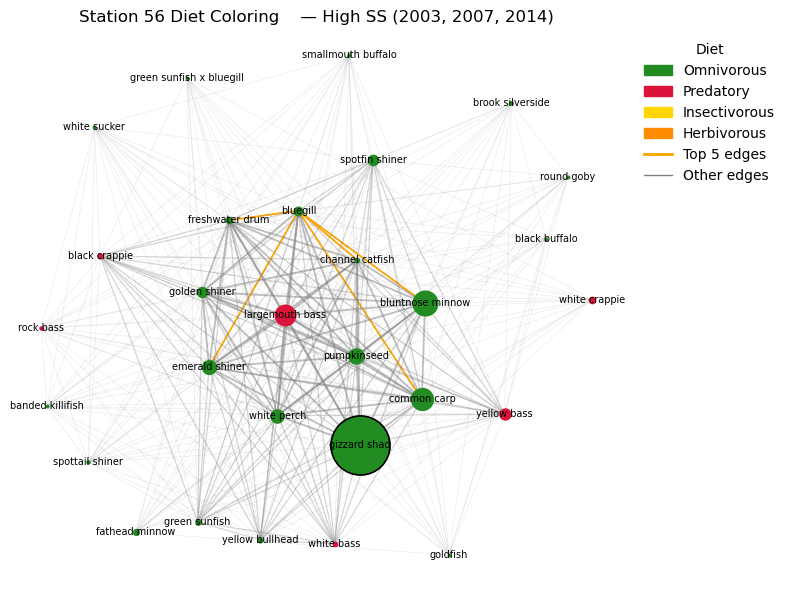

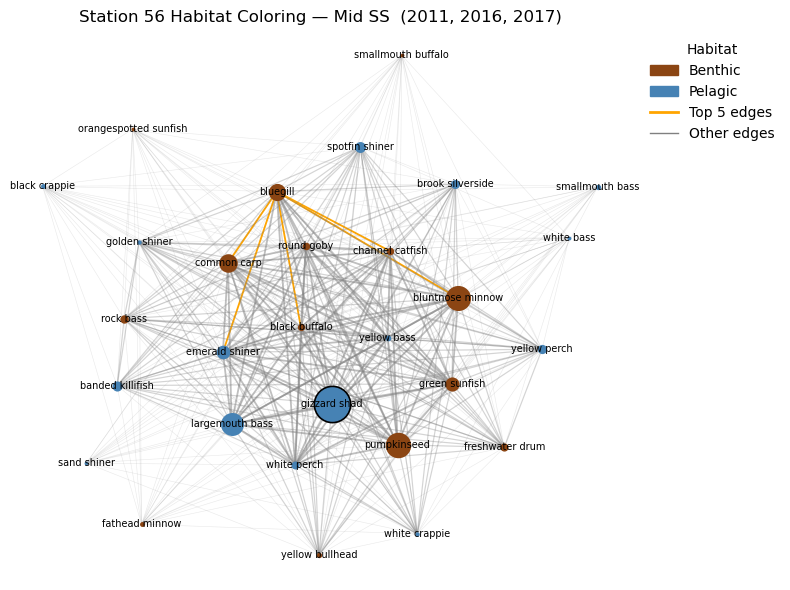

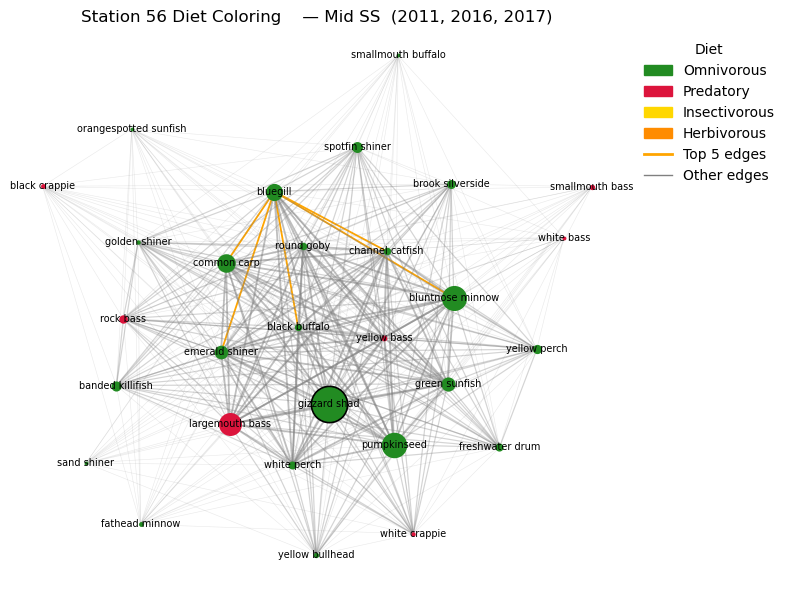

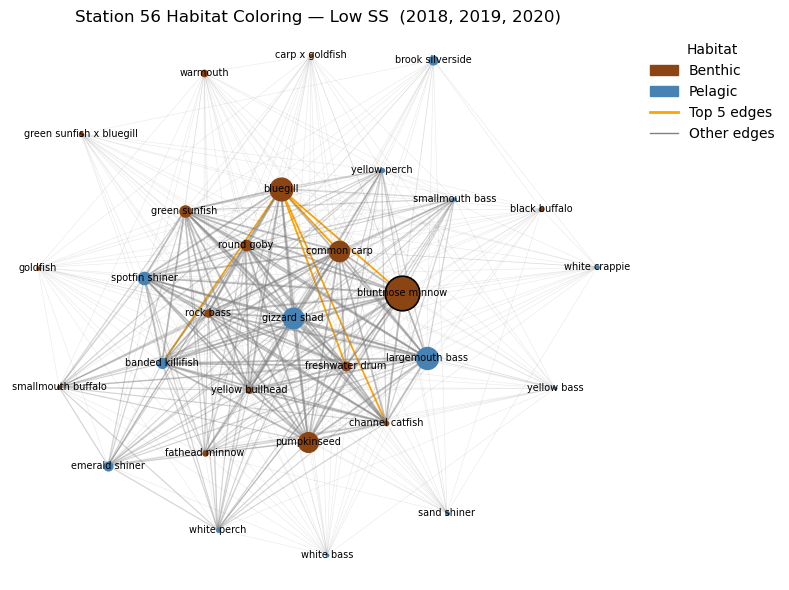

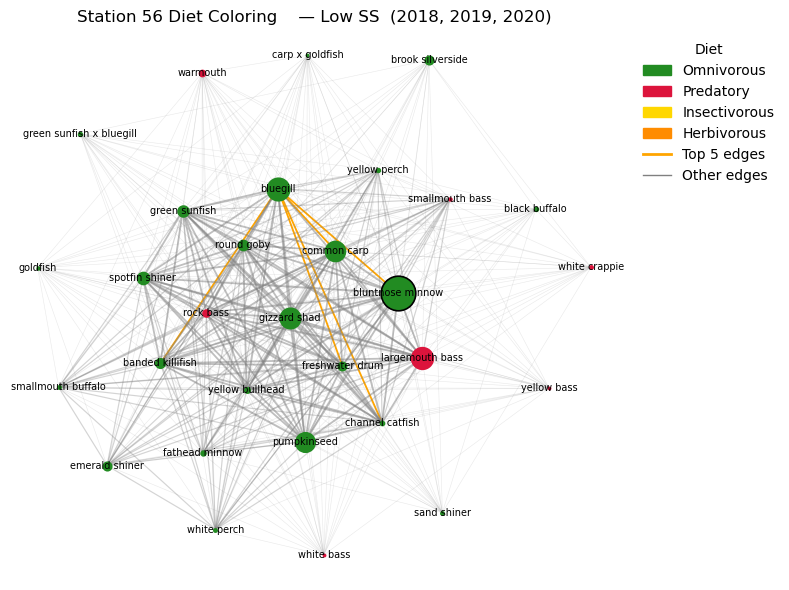

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# 1. Load data
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)
df['Station Number'] = df['Station Number'].astype(int)

# 2. Identify fish columns (everything after TOC_Max)
cols = df.columns.tolist()
toc_max_idx = cols.index('TOC_Max')
fish_cols = cols[toc_max_idx+1:]

# 3. Full classification mapping (all 77 species)
raw_class = {
    "Bigmouth Shiner": ("Pelagic", "Omnivorous"),
    "Bluegill": ("Benthic", "Omnivorous"),
    "Bluntnose Minnow": ("Benthic", "Omnivorous"),
    "Fathead Minnow": ("Benthic", "Omnivorous"),
    "Golden Shiner": ("Pelagic", "Omnivorous"),
    "Spotfin Shiner": ("Pelagic", "Omnivorous"),
    "White Sucker": ("Benthic", "Omnivorous"),
    "Common Carp": ("Benthic", "Omnivorous"),
    "Green Sunfish": ("Benthic", "Omnivorous"),
    "Largemouth Bass": ("Pelagic", "Predatory"),
    "Orangespotted Sunfish": ("Benthic", "Omnivorous"),
    "Yellow Bullhead": ("Benthic", "Omnivorous"),
    "Blackstripe Topminnow": ("Pelagic", "Omnivorous"),
    "Gizzard Shad": ("Pelagic", "Omnivorous"),
    "Johnny Darter": ("Benthic", "Insectivorous"),
    "Sand Shiner": ("Pelagic", "Omnivorous"),
    "Spottail Shiner": ("Pelagic", "Omnivorous"),
    "Channel Catfish": ("Benthic", "Omnivorous"),
    "Emerald Shiner": ("Pelagic", "Omnivorous"),
    "Grass Pickerel": ("Benthic", "Predatory"),
    "Mosquitofish": ("Pelagic", "Insectivorous"),
    "Black Bullhead": ("Benthic", "Omnivorous"),
    "Green Sunfish x Pumpkinseed": ("Benthic", "Omnivorous"),
    "Brook Stickleback": ("Benthic", "Insectivorous"),
    "Carp x Goldfish": ("Benthic", "Omnivorous"),
    "Goldfish": ("Benthic", "Omnivorous"),
    "Pumpkinseed": ("Benthic", "Omnivorous"),
    "Freshwater Drum": ("Benthic", "Omnivorous"),
    "Round Goby": ("Benthic", "Omnivorous"),
    "Smallmouth Bass": ("Pelagic", "Predatory"),
    "White Perch": ("Pelagic", "Omnivorous"),
    "Yellow Bass": ("Pelagic", "Predatory"),
    "Chinook Salmon": ("Pelagic", "Predatory"),
    "Grass Carp": ("Benthic", "Herbivorous"),
    "Quillback": ("Benthic", "Omnivorous"),
    "Rock Bass": ("Benthic", "Predatory"),
    "Creek Chub": ("Benthic", "Omnivorous"),
    "Black Crappie": ("Pelagic", "Predatory"),
    "Green Sunfish x Bluegill": ("Benthic", "Omnivorous"),
    "Walleye": ("Pelagic", "Predatory"),
    "Blackside Darter": ("Benthic", "Insectivorous"),
    "Pumpkinseed x Bluegill": ("Benthic", "Omnivorous"),
    "Warmouth": ("Benthic", "Predatory"),
    "Alewife": ("Pelagic", "Omnivorous"),
    "Skipjack Herring": ("Pelagic", "Omnivorous"),
    "Pirate Perch": ("Benthic", "Predatory"),
    "Longear Sunfish": ("Benthic", "Omnivorous"),
    "Black Buffalo": ("Benthic", "Omnivorous"),
    "White Bass": ("Pelagic", "Predatory"),
    "White Crappie": ("Pelagic", "Predatory"),
    "Northern Pike": ("Benthic", "Predatory"),
    "Spotted Sucker": ("Benthic", "Omnivorous"),
    "Tadpole Madtom": ("Benthic", "Omnivorous"),
    "Golden Redhorse": ("Benthic", "Omnivorous"),
    "Hornyhead Chub": ("Benthic", "Omnivorous"),
    "Bowfin": ("Benthic", "Predatory"),
    "Sauger": ("Pelagic", "Predatory"),
    "Yellow Perch": ("Pelagic", "Omnivorous"),
    "Central Mudminnow": ("Benthic", "Omnivorous"),
    "Brown Bullhead": ("Benthic", "Omnivorous"),
    "Green Sunfish x Longear": ("Benthic", "Omnivorous"),
    "Green Sunfish x Orangespot": ("Benthic", "Omnivorous"),
    "Brook Silverside": ("Pelagic", "Omnivorous"),
    "Smallmouth Buffalo": ("Benthic", "Omnivorous"),
    "Common Shiner": ("Pelagic", "Omnivorous"),
    "Fantail Darter": ("Benthic", "Insectivorous"),
    "Oriental Weatherfish": ("Benthic", "Omnivorous"),
    "Iowa Darter": ("Benthic", "Insectivorous"),
    "Banded Killifish": ("Pelagic", "Omnivorous"),
    "Flathead Catfish": ("Benthic", "Predatory"),
    "Central Stoneroller": ("Benthic", "Omnivorous"),
    "Mimic Shiner": ("Pelagic", "Omnivorous"),
    "Logperch": ("Benthic", "Insectivorous"),
    "Threadfin Shad": ("Pelagic", "Omnivorous"),
    "Longnose Gar": ("Benthic", "Predatory"),
    "Rosyface Shiner": ("Pelagic", "Omnivorous"),
    "Stonecat": ("Benthic", "Omnivorous"),
}
classification = {k.lower(): v for k, v in raw_class.items()}

# 4. Build co-occurrence network
def build_cooccurrence_network(subdf, fish_columns):
    G = nx.Graph()
    co, totals = {}, {fish:0 for fish in fish_columns}
    for _, row in subdf.iterrows():
        present = [f for f in fish_columns if row[f] > 0]
        for f1, f2 in combinations(sorted(present), 2):
            co[(f1, f2)] = co.get((f1, f2), 0) + 1
        for f in present:
            totals[f] += row[f]
    for fish, cnt in totals.items():
        if cnt > 0:
            G.add_node(fish, abundance=cnt)
    for (f1, f2), w in co.items():
        G.add_edge(f1, f2, weight=w)
    return G

# 5. Plot helper with legend
plt.style.use('default')
def plot_colored_network(G, title, color_by=0, k=6):
    pos = nx.spring_layout(G, k=k, iterations=100, seed=42)
    abundances = nx.get_node_attributes(G, 'abundance')
    max_node = max(abundances, key=abundances.get)
    edges_data = list(G.edges(data=True))
    weights = [d['weight'] for _,_,d in edges_data] or [1]
    max_w = max(weights)
    sorted_edges = sorted(edges_data, key=lambda x: x[2]['weight'], reverse=True)
    top5 = set((u, v) for u, v, _ in sorted_edges[:5])

    # Choose palette and map node colors case-insensitive
    if color_by == 0:
        palette = {"benthic":"saddlebrown", "pelagic":"steelblue"}
        cats = {n: classification.get(n.lower(),("",""))[0].lower() for n in G.nodes()}
        legend_nodes = [Patch(color=col, label=lab.capitalize()) for lab,col in palette.items()]
        legend_edges = [Line2D([0],[0], color='orange', lw=2, label='Top 5 edges'),
                        Line2D([0],[0], color='gray', lw=1, label='Other edges')]
    else:
        palette = {"omnivorous":"forestgreen", "predatory":"crimson",
                   "insectivorous":"gold", "herbivorous":"darkorange"}
        cats = {n: classification.get(n.lower(),("",""))[1].lower() for n in G.nodes()}
        legend_nodes = [Patch(color=col, label=lab.capitalize()) for lab,col in palette.items()]
        legend_edges = [Line2D([0],[0], color='orange', lw=2, label='Top 5 edges'),
                        Line2D([0],[0], color='gray', lw=1, label='Other edges')]

    node_colors = [palette.get(cats[n], "lightgray") for n in G.nodes()]

    fig, ax = plt.subplots(figsize=(8,6), facecolor='white')
    ax.set_facecolor('white'); ax.set_axis_off()

    # Draw edges
        # Draw edges
    for u, v, d in edges_data:
        w = d['weight']
        lw = (w / max_w) * 1.3 + 0
        # fully opaque for top5, otherwise scaled
        if (u, v) in top5 or (v, u) in top5:
            color = 'orange'
            alpha_edge = 1.0
        else:
            color = 'gray'
            alpha_edge = (w / max_w) * 0.5 + 0
        ax.plot([pos[u][0], pos[v][0]],
                [pos[u][1], pos[v][1]],
                linewidth=lw,
                color=color,
                alpha=alpha_edge,
                zorder=1)


    # Draw nodes
    for n in G.nodes():
        size=abundances[n]*1.5+1; ec='black' if n==max_node else None
        ax.scatter(pos[n][0],pos[n][1], s=size,
                   c=node_colors[list(G.nodes()).index(n)],
                   edgecolors=ec, linewidths=1.2, zorder=2)

    # Add labels
    for n in G.nodes():
        ax.text(pos[n][0],pos[n][1], n, fontsize=7,
                ha='center', va='center', zorder=3)

    # Add legends
    # position node legend top-left, edge legend below
    ax.legend(handles=legend_nodes + legend_edges,
              loc='upper left', bbox_to_anchor=(1.02, 1),
              title=("Habitat" if color_by==0 else "Diet"),
              frameon=False)

    ax.set_title(title, fontsize=12)
    plt.tight_layout()
    fig.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

# 6. Year groups and plotting six graphs
year_groups = {
    'High SS (2003, 2007, 2014)': [2003, 2007, 2014],
    'Mid SS  (2011, 2016, 2017)': [2011, 2016, 2017],
    'Low SS  (2018, 2019, 2020)': [2018, 2019, 2020],
}

station = 56
for label, years in year_groups.items():
    sub = df[(df['Station Number']==station) & (df['Year'].isin(years))]
    G = build_cooccurrence_network(sub, fish_cols)
    plot_colored_network(G, f"Station 56 Habitat Coloring ‚Äî {label}", color_by=0)
    plot_colored_network(G, f"Station 56 Diet Coloring    ‚Äî {label}", color_by=1)


In [81]:
import pandas as pd
import networkx as nx
from itertools import combinations

# 1. Load data
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)
df['Station Number'] = df['Station Number'].astype(int)

# 2. Identify fish species columns (everything after 'TOC_Max')
cols = df.columns.tolist()
toc_max_idx = cols.index('TOC_Max')
fish_cols = cols[toc_max_idx+1:]

# 3. Function to build co‚Äêoccurrence network over a set of years
def build_cooccurrence_network(subdf):
    G = nx.Graph()
    co = {}
    totals = {fish: 0 for fish in fish_cols}
    for _, row in subdf.iterrows():
        present = [f for f in fish_cols if row[f] > 0]
        for f1, f2 in combinations(sorted(present), 2):
            co[(f1, f2)] = co.get((f1, f2), 0) + 1
        for f in present:
            totals[f] += row[f]
    for fish, cnt in totals.items():
        if cnt > 0:
            G.add_node(fish, abundance=cnt)
    for (f1, f2), w in co.items():
        G.add_edge(f1, f2, weight=w)
    return G

# 4. Define year groups
year_groups = {
    'High SS (2003, 2007, 2014)': [2003, 2007, 2014],
    'Mid SS  (2011, 2016, 2017)': [2011, 2016, 2017],
    'Low SS  (2018, 2019, 2020)': [2018, 2019, 2020],
}

# 5. Compute network metrics for Station 56 in each group
metrics = []
station = 56
for label, years in year_groups.items():
    sub = df[(df['Station Number'] == station) & (df['Year'].isin(years))]
    G = build_cooccurrence_network(sub)
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    avg_clustering = nx.average_clustering(G) if n_nodes > 0 else 0
    n_components = nx.number_connected_components(G)
    largest_cc = max(nx.connected_components(G), key=len) if n_components > 0 else set()
    size_lcc = len(largest_cc)
    avg_degree = sum(dict(G.degree()).values()) / n_nodes if n_nodes > 0 else 0
    metrics.append({
        'Group': label,
        'Nodes': n_nodes,
        'Edges': n_edges,
        'Density': round(density, 4),
        'Avg Clustering': round(avg_clustering, 4),
        'Components': n_components,
        'Largest CC Size': size_lcc,
        'Avg Degree': round(avg_degree, 2)
    })

# 6. Display results
df_metrics = pd.DataFrame(metrics)
print(df_metrics.to_string(index=False))


                     Group  Nodes  Edges  Density  Avg Clustering  Components  Largest CC Size  Avg Degree
High SS (2003, 2007, 2014)     29    337   0.8300          0.9136           1               29       23.24
Mid SS  (2011, 2016, 2017)     29    371   0.9138          0.9435           1               29       25.59
Low SS  (2018, 2019, 2020)     30    390   0.8966          0.9409           1               30       26.00


In [82]:
import pandas as pd
import networkx as nx
from itertools import combinations

# 1. Load data
df = pd.read_csv('combined_df_expanded_species.csv')
df['Year'] = df['Year'].astype(int)
df['Station Number'] = df['Station Number'].astype(int)

# 2. Identify fish columns
cols = df.columns.tolist()
toc_max_idx = cols.index('TOC_Max')
fish_cols = cols[toc_max_idx+1:]

# 3. Build co‚Äêoccurrence network
def build_cooccurrence_network(subdf):
    G = nx.Graph()
    co = {}
    totals = {fish: 0 for fish in fish_cols}
    for _, row in subdf.iterrows():
        present = [f for f in fish_cols if row[f] > 0]
        for f1, f2 in combinations(sorted(present), 2):
            co[(f1, f2)] = co.get((f1, f2), 0) + 1
        for f in present:
            totals[f] += row[f]
    for fish, cnt in totals.items():
        if cnt > 0:
            G.add_node(fish, abundance=cnt)
    for (f1, f2), w in co.items():
        G.add_edge(f1, f2, weight=w)
    return G

# 4. Define year groups
year_groups = {
    'High SS (2003, 2007, 2014)': [2003, 2007, 2014],
    'Mid SS  (2011, 2016, 2017)': [2011, 2016, 2017],
    'Low SS  (2018, 2019, 2020)': [2018, 2019, 2020],
}

station = 56

# 5. Compute and print additional network metrics
for label, years in year_groups.items():
    sub = df[(df['Station Number'] == station) & (df['Year'].isin(years))]
    G = build_cooccurrence_network(sub)

    print(f"\n=== {label} ===")
    # Basic structural metrics
    print("Nodes:", G.number_of_nodes())
    print("Edges:", G.number_of_edges())
    print("Density:", round(nx.density(G), 4))
    print("Average clustering (unweighted):", round(nx.average_clustering(G), 4))
    print("Transitivity (global clustering):", round(nx.transitivity(G), 4))
    print("Connected components:", nx.number_connected_components(G))
    if nx.is_connected(G):
        print("Diameter:", nx.diameter(G))
        print("Average shortest path length:", round(nx.average_shortest_path_length(G), 4))
    else:
        print("Diameter: N/A (disconnected)")
        # can compute for largest component
        cc = max(nx.connected_components(G), key=len)
        H = G.subgraph(cc)
        print("Avg path length (largest CC):", round(nx.average_shortest_path_length(H), 4))

    # Centrality measures
    deg_cent = nx.degree_centrality(G)
    bet_cent = nx.betweenness_centrality(G, weight=None)
    clo_cent = nx.closeness_centrality(G)
    eig_cent = nx.eigenvector_centrality(G, max_iter=1000)

    def top_n(metric_dict, n=5):
        return sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)[:n]

    print("Top 5 by degree centrality:", top_n(deg_cent))
    print("Top 5 by betweenness centrality:", top_n(bet_cent))
    print("Top 5 by closeness centrality:", top_n(clo_cent))
    print("Top 5 by eigenvector centrality:", top_n(eig_cent))



=== High SS (2003, 2007, 2014) ===
Nodes: 29
Edges: 337
Density: 0.83
Average clustering (unweighted): 0.9136
Transitivity (global clustering): 0.8838
Connected components: 1
Diameter: 2
Average shortest path length: 1.17
Top 5 by degree centrality: [('bluegill', 1.0), ('bluntnose minnow', 1.0), ('golden shiner', 1.0), ('common carp', 1.0), ('largemouth bass', 1.0)]
Top 5 by betweenness centrality: [('bluegill', 0.014031647364980696), ('bluntnose minnow', 0.014031647364980696), ('golden shiner', 0.014031647364980696), ('common carp', 0.014031647364980696), ('largemouth bass', 0.014031647364980696)]
Top 5 by closeness centrality: [('bluegill', 1.0), ('bluntnose minnow', 1.0), ('golden shiner', 1.0), ('common carp', 1.0), ('largemouth bass', 1.0)]
Top 5 by eigenvector centrality: [('bluegill', 0.21281605154211905), ('bluntnose minnow', 0.21281605154211905), ('golden shiner', 0.21281605154211905), ('common carp', 0.21281605154211905), ('largemouth bass', 0.21281605154211905)]

=== Mid SS